##Setup

In [114]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Tópicos estudados do livro *Learning from data*:
1.   The Learning Problem
2.   Training versus Testing



##1. Motivação
Considere um problema comum para as plataformas de streaming nos dias de hoje: quais filmes recomendar para uma pessoa que tenha assistido vários outros filmes na mesma plataforma. Temos os dados dos filmes que a pessoa assistiu, isto é, sabemos o gênero dos filmes, os atores que estão neles, as avaliações nos sites de crítica etc. Com esses dados, conseguimos saber qual tipo de filme a pessoa geralmente gosta mais, como, por exemplo, se gosta de filmes de romance com um ator específico e avaliações altas para a crítica ou se gosta de filmes de terror com atores pouco conhecidos e com um gosto menos exigente para avaliações. A partir desses dados, podemos escolher, para cada filme na seleção possível, se vamos recomendá-los para o consumidor. Assim, tomando como exemplo uma pessoa que geralmente gosta mais de filmes de romance, será menos provável que apareçam filmes de terror para ela na plataforma.

Num contexto diferente, imagine que temos uma empresa imobiliária e precisamos estimar preços de casas conforme suas características. Novamente possuímos em mãos dados que representam o preço de vendas anteriores de certas casas, e sabemos as características de cada casa vendida. Se precisamos planejar o preço de uma casa com piscina, por exemplo, podemos verificar os nossos dados de vendas passadas e atestar que casas com piscina são mais caras do que aquelas que não possuem piscina. Com base nos dados, podemos levantar um preço para que a venda da casa que estamos considerando esteja dentro do padrão de faixa de valores.

O que os exemplos acima têm em comum é que estamos aprendendo com dados. Com base em dados levantados anteriormente, podemos predizer quais filmes uma pessoa com tais gostar vai aproveitar mais ou qual o preço a selecionar para uma casa com tais características dados preços de vendas anteriores de outras casas. Com o uso de um computador para aprender com dados e predizer instâncias específicas, entramos na área de Machine Learning (ML).

##2. Abstração inicial
De modo a abstrair esse processo de aprendizado para maiores generalizações, considere que temos uma entrada $𝐱$ (as características de uma casa que queremos fazer a predição de preço de venda, por exemplo) e a função-alvo desconhecida $f:\mathcal{X}\to\mathcal{Y}$ (função ideal de preço), em que $\mathcal{X}$ é o espaço de entrada (conjunto de todas as possíveis entradas $𝐱$) e $\mathcal{Y}$ é o espaço de saída (conjunto de todas as possíveis saídas, ou seja, os preços). Temos também o conjunto de dados $\mathcal{D}$ com os pares entrada-saída $(𝐱_1, y_1), \dots,(𝐱_N, y_N)$, de modo que $y_n=f(𝐱_n)$ para $n=1,\dots,N$ (em que cada $(𝐱_n,y_n)$ corresponde a uma casa com características $𝐱_n$ vendida anteriormente com preço $y_n$). O algoritmo de aprendizado utiliza o conjunto de dados $\mathcal{D}$ para escolher uma função $g:\mathcal{X}\to \mathcal{Y}$ de um conjunto de hipóteses $\mathcal{H}$ que aproxima $f$.

##3. PLA
Um modelo de aprendizado consiste em $\mathcal{H}$ e no algoritmo usado para aprender. Podemos escolher um modelo a partir de um problema de aprendizado, mas $f$ e $\mathcal{D}$ são limitados pelo próprio problema. Para apresentar o primeiro modelo, teremos em mente um exemplo diferente do anterior: temos um banco e devemos analisar as informações de um cliente que quer aplicar para crédito financeiro (como histórico de dívidas, salário etc.) com base em dados que apresentam informações de clientes passados e se foram aprovados.

Seja $\mathcal{X}=\mathbb{R}^d$ o espaço de entrada ($d$ é o número de informações que temos de cada cliente, isto é, $𝐱=[x_1,\dots,x_d]^T\in\mathcal{X}$, onde $^T$ representa a transposta de um vetor, é vetor em $\mathbb{R}^d$) e $\mathcal{Y}=\{+1,-1\}$ o espaço de saída ($+1$ representa a aprovação e $-1$ representa a reprovação de crédito). Para escolhermos o nosso espaço de hipóteses $\mathcal{H}$, considere o conjunto de funções lineares de variáveis $x_i$ e coeficientes correspondentes $w_i$ (como a "pontuação" do cliente), para $i=1,\dots,d$, tais que
\begin{align*}
    y=\begin{cases}+1\quad\text{, se $\sum_{i=1}^dw_ix_i>$ barreira}\\
    -1\quad\text{, se $\sum_{i=1}^dw_ix_i<$ barreira,}\end{cases}
\end{align*}
de modo que cada peso $w_i$ reflita a importância (seja positiva ou negativa) de cada informação $x_i$ na decisão $y$ e que o valor "barreira" denote o número escolhido para aprovar ou não o crédito ao cliente. Assim, todo $h\in\mathcal{H}$ pode ser denotado como
\begin{align*}
    h(𝐱)=\text{sign}\biggl(\biggl(\sum_{i=1}^dw_ix_i\biggr)+b\biggr),
\end{align*}
em que $b=$ barreira, e $\text{sign}(s)=+1$ se $s$ é positivo e $\text{sign}(s)=-1$ se $s$ é negativo. Essa forma de hipóteses é válida porque o crédito é aprovado caso $\sum_{i=1}^dw_ix_i>-b$ e não é aprovado caso $\sum_{i=1}^dw_ix_i<-b$. Esse modelo de $\mathcal{H}$ é chamado de **perceptron**. Simplificando a notação, vamos considerar $w_0=b$ e $x_0=1$ para denotar a fórmula do perceptron como uma operação de vetores coluna, de modo que $𝐰=[w_0,w_1,\dots,w_d]^T$ e $\mathcal{X}=\{1\}\times\mathbb{R}^d=\{𝐱=[x_0,x_1,\dots,x_d]^T|x_0=1,x_1\in\mathbb{R},\dots,x_d\in\mathbb{R}\}$, e obtemos, assim,
\begin{align*}
    h(𝐱)=\text{sign}(𝐰^T𝐱).
\end{align*}
Note que $𝐰^T𝐱$ é simplesmente o produto interno dos vetores colunas $𝐰$ e $𝐱$.

De modo a finalmente apresentar o algoritmo de aprendizado, nesse caso chamado de **algoritmo perceptron de aprendizado** (PLA), tenha em mente que o algoritmo determina os pesos $𝐰$ a partir de $\mathcal{D}$. Vamos assumir que $\mathcal{D}$ é linearmente separável, isto é, que existe um vetor $𝐰$ que corretamente seleciona $h(𝐱_n)=y_n$ para $i=1,\dots,N$ (todo $𝐱\in\mathcal{D}$).

O algoritmo funciona por um método iterativo: a cada iteração $t=0,1,\dots$, o valor atual de $𝐰$ é $𝐰(t)$, e esse valor é atualizado por meio da seleção de uma instância $(𝐱(t),y(t))$ que ainda não foi classificada corretamente (pertencente a $\{(𝐱_1,y_1),\dots,(𝐱_N,y_N)\}$). A partir disso, sabemos que $y(t)$, a decisão correta para $x(t)$ correspondente em $\mathcal{D}$, não é igual a $\text{sign}(𝐰^T(t)𝐱(t))$, o valor calculado pela fórmula do perceptron com os pesos atuais $𝐰(t)$. Para atualizar $𝐰(t)$ para $𝐰(t+1)$, realizamos
\begin{align*}
    𝐰(t+1)=𝐰(t)+y(t)𝐱(t).
\end{align*}
A atualização move o vetor $𝐰$ na direção para classificar $𝐱(t)$ corretamente, com base no valor de $y(t)$, que é ligado a propriedades do produto interno entre $𝐱(t)$ e $𝐰(t)$. (Quando $y(t)>0$, então esses dois vetores têm sentidos contrários em relação à projeção de um deles no outro e a atualização com $y(t)$ positivo induzirá $𝐰(t)$ a ir ao mesmo sentido de $𝐱(t)$. Quando $y(t)<0$, então eles possuem sentidos correspondentes em relação à projeção de um deles no outro e a atualização com $y(t)$ negativo induzirá $𝐰(t)$ a ir ao sentido contrário de $𝐱(t)$.) A regra de parada é dada a partir da classificação correta de todas as instâncias em $\mathcal{D}$ pela fórmula do perceptron (no final, alcançamos um $g$ que aproxima $f$). Mesmo que $\mathcal{H}$ seja um espaço infinito, o PLA consegue determinar $𝐰$ em um número finito de passos.

Abaixo está implementado o código do PLA:

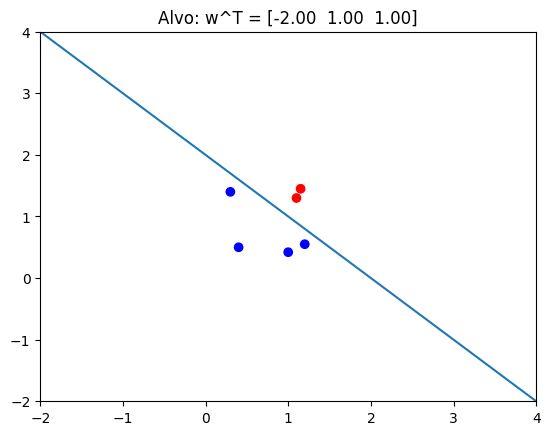

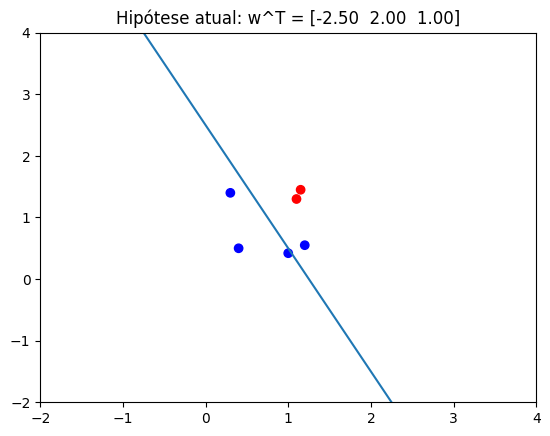

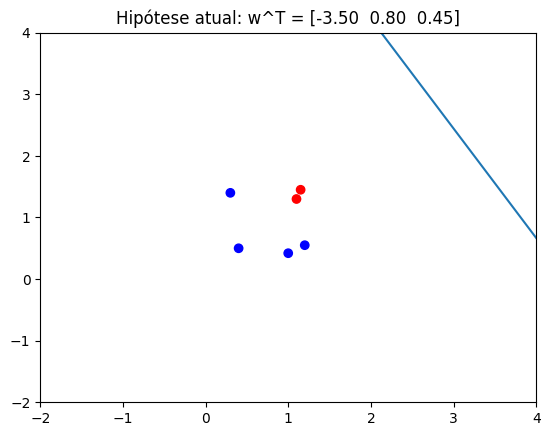

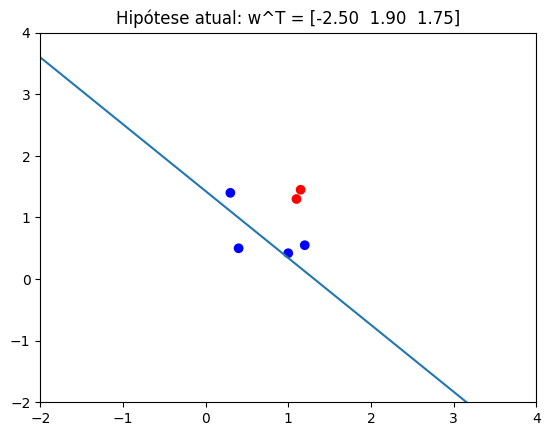

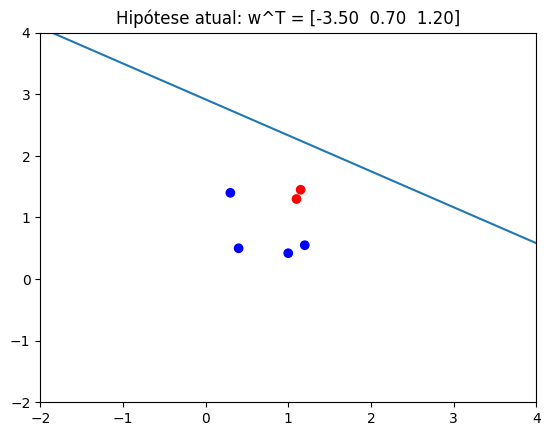

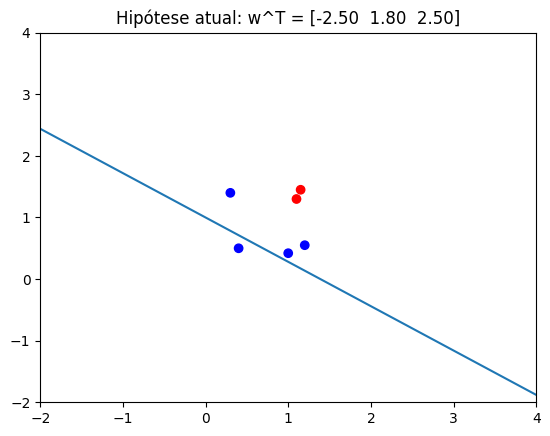

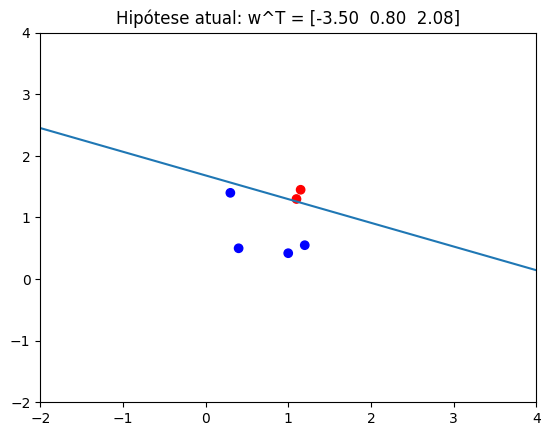


Treinamento concluído em 5 iterações.



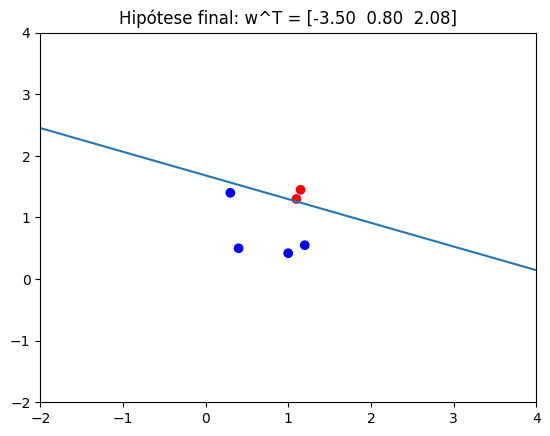

In [115]:
"""
N = 6 (número de instâncias)
d = 2 (número de "informações")
x é matriz N x (d+1) = 6 x 3
y é array N x 1 = 6 x 1
w é array (d+1) x 1 = 3 x 1
"""

x = np.asarray([[1, 0.4, 0.5], [1, 1.2, 0.55], [1, 0.3, 1.4], [1, 1.1, 1.3], [1, 1.15, 1.45], [1, 1, 0.42]]) # x0 = 1 já adicionado para todas as instâncias
w_target = np.asarray([[-2], [1], [1]])                                                                      # w0 = b, a "barreira"
N = x.shape[0]

y = np.sign(np.dot(x, w_target))
colors = ['blue' if y[i] == -1 else 'red' for i in range(N)]

# w[2]*y + w[1]*x + w[0] = 0 -> y = (-w[1]/w[2])*x + (-w[0]/w[2]) = a*x + b
# (b dessa equação da reta, que é o coeficiente linear, não é o mesmo b anterior, que é a barreira)
a = -w_target[1] / w_target[2]
b = -w_target[0] / w_target[2]
xx = np.linspace(-2, 4, 100)
yy = a*xx + b

plt.figure()
axes = plt.gca()
axes.set_xlim([-2, 4])
axes.set_ylim([-2, 4])
plt.title(f"Alvo: w^T = [{w_target[0][0]:.2f}  {w_target[1][0]:.2f}  {w_target[2][0]:.2f}]")
plt.scatter(x[:, 1], x[:, 2], c=colors)
plt.plot(xx, yy)
plt.show()
print()

def PLA(x, y, w):
  wt = w
  iterations = 0

  while True:
      hx = np.sign(np.dot(x, wt))
      misclassified = np.where(y != hx)[0]

      a = -wt[1] / wt[2]
      b = -wt[0] / wt[2]
      plt.figure()
      axes = plt.gca()
      axes.set_xlim([-2, 4])
      axes.set_ylim([-2, 4])
      plt.title(f"Hipótese atual: w^T = [{wt[0][0]:.2f}  {wt[1][0]:.2f}  {wt[2][0]:.2f}]")
      plt.scatter(x[:, 1], x[:, 2], c=colors)
      plt.plot(xx, a*xx+b)
      plt.show()

      if misclassified.size == 0:
        print()
        print("Treinamento concluído em", iterations, "iterações.")
        print()
        return wt

      i = np.random.choice(misclassified)
      d = y[i][0]*x[i]
      d = d.reshape(3,1)                  # d da multiplicação anterior tem dimensão (3,) -- dimensão em formato inválido ao PLA
      wt = wt + d

      iterations += 1

w = np.asarray([[-2.5], [2], [1]])
np.random.seed(42)
w_final = PLA(x, y, w)

a = -w_final[1] / w_final[2]
b = -w_final[0] / w_final[2]
plt.figure()
axes = plt.gca()
axes.set_xlim([-2, 4])
axes.set_ylim([-2, 4])
plt.title(f"Hipótese final: w^T = [{w_final[0][0]:.2f}  {w_final[1][0]:.2f}  {w_final[2][0]:.2f}]")
plt.scatter(x[:, 1], x[:, 2], c=colors)
plt.plot(xx, a*xx+b)
plt.show()

##4. Discussão inicial sobre capacidade de generalização
Para analisar a capacidade de generalização do aprendizado com dados, devemos contruir mais abstrações relacionadas ao processo característico. Denote $E_{in}(h)$ como a proporção de $\mathcal{D}$ em que $f$ e $h$ não são iguais (note que $E_{in}$ depende de $h$, já que o valor $h(𝐱)$ é dependente de cada $h$ que escolhermos). Assim,
\begin{align*}
    E_{in}(h)=\frac{1}{N}\sum_{n=1}^N 𝟙_{\{h(𝐱_n)\neq f(𝐱_n)\}},
\end{align*}
em que $𝟙_{\{h(𝐱_n)\neq f(𝐱_n)\}}$ é uma variável indicadora do evento $\{h(𝐱_n)\neq f(𝐱_n)\}$. Esse é o erro na amostra ou conjunto de treinamento. Similarmente, denote o erro fora da amostra ou no domínio de todas as instâncias possíveis (também dependente do $h$ escolhido) como $E_{out}(h)$, de modo que
\begin{align*}
    E_{out}(h)=ℙ[h(𝐱)\neq f(𝐱)],
\end{align*}
em que a probabilidade depende da distribuição $P$ sobre $\mathcal{X}$, a qual foi utilizada para fazer a amostragem dos $𝐱$.

Note que, para conseguir $\mathcal{D}$, foi necessário realizar uma amostragem do conjunto de todas as instâncias possíveis e, por isso, chamamos $E_{in}(h)$ de erro na amostra ou conjunto de treinamento (que é uma variável aleatória, já que selecionamos a amostra com base numa distribuição $P$ sobre todo o espaço $\mathcal{X}$). Além disso, o erro que importa para estimar a performance do modelo em predições de instâncias novas, $E_{out}(h)$, envolve todas as instâncias $(𝐱,y)$, incluindo aquelas fora de $\mathcal{D}$. Por não sabermos como $h$ comporta-se fora do conjunto de treinamento (mesmo que $E_{out}(h)$ não seja uma variável aleatória), dispomos da probabilidade com a mesma distribuição utilizada para obter as amostras.

A partir da Desigualdade de Hoeffding, temos que
\begin{align*}
    ℙ[|E_{in}(h)-E_{out}(h)|>\epsilon]\leq 2e^{-2\epsilon^2N}, \quad \epsilon>0.
\end{align*}
O que essa desigualdade traz de informação é que, dada uma tolerância $\epsilon>0$ de nossa escolha, a probabilidade de que os erros na amostra e fora da amostra sejam muito díspares, de acordo com a tolerância, não é maior do que $2e^{-2\epsilon^2N}$, valor que depende da tolerância escolhida e o tamanho $N$ de $\mathcal{D}$. Dessa forma, quanto maior o conjunto de treinamento, menor é a probabilidade de que a diferença citada seja muito díspar conforme a tolerância. Isso significa que a hipótese fixa $h$ tem a capacidade de generalizar bem para conjuntos de dados fora da amostra selecionada também. Além disso, note que, se escolhermos $\epsilon$ extremamente pequeno, devemos ter um conjunto de treinamento maior para compensar o valor da probabilidade descrita, que desejamos que seja pequena. Nesse caso, estamos lidando com $h$ fixo antes da amostragem.

Gostaríamos de generalizar a desigualdade para todo um conjunto finito $\mathcal{H}=\{h_1,\dots,h_M\}$, já que isso ajudaria a atestar a capacidade do aprendizado com dados (é importante lembrar também que os algoritmos de aprendizado podem testar várias hipóteses $h$ antes de chegar em $g$, sendo que já temos uma amostra definida). Para isso, utilizamos algumas propriedades da probabilidade para obter
\begin{align*}
    ℙ[|E_{in}(g)-E_{out}(g)|>\epsilon]\leq 2Me^{-2\epsilon^2N}.
\end{align*}
O $M$ presente na desigualdade aparece porque estamos lidando com as aproximações de todos os $E_{out}(h_m)$ pelos $E_{in}(h_m)$ correspondentes simultaneamente, para $h=1,\dots, M$.

De modo alternativo (mas sob a mesma desigualdade acima), escolha um nível de tolerância $0<\delta\leq 1$. Podemos afirmar com probabilidade pelo menos $1-\delta$ que
\begin{align*}
    E_{out}(g)\leq E_{in}(g)+\sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}.
\end{align*}
Esse é um limite de generalização (superior) para $E_{out}$ em termos de $E_{in}$. Para obter o limite acima, considere $\delta=2Me^{-2N\epsilon^2}$, de modo que $\epsilon=\sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}$. Assim, temos que, pela desigualdade referente à probabilidade,
\begin{align}
ℙ[|E_{out}(g)-E_{in}(g)|\leq\epsilon]&>1-2Me^{-2\epsilon^2N}\\
ℙ[E_{out}(g)\leq E_{in}(g)+\epsilon]&>1-\delta\\
ℙ\biggl[E_{out}(g)\leq E_{in}(g)+\sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}\biggr]&>1-\delta.
\end{align}
Note que a afirmação para $E_{out}\geq E_{in}-\epsilon$ também vale para todo $h\in\mathcal{H}$.

O limite imposto pelas desigualdades só faz sentido se $M$ for finito, o que é um problema, já que normalmente lidamos com espaços de hipóteses infinitos, como no exemplo do crédito financeiro. Para generalizar ainda mais (para $\mathcal{H}$ de tamanho infinito), lembre-se do modelo do perceptron: conforme $𝐰$ varia, há infinitamente diversas hipóteses $h$ que diferem de cada uma de forma infinitesimal e que não mudam o valor calculado $h(𝐱)\in\{-1,1\}^N$, para hipóteses "próximas" uma da outra. Na próxima seção, levaremos em conta uma característica relacionada a essa para ampliar a generalização.

##5. Análise mais aprofundada da capacidade de generalização
###5.1. Definições iniciais
Considere $𝐱_1,\dots,𝐱_N\in\mathcal{X}$. As **dicotomias** geradas por $\mathcal{H}$ nesses pontos são definidas como
\begin{align*}
    \mathcal{H}(𝐱_1,\dots,𝐱_N)=\{(h(𝐱_1),\dots,h(𝐱_N))|h\in\mathcal{H}\}.
\end{align*}
Essas dicotomias são um conjunto de hipóteses vistas através dos pontos definidos.

Defina agora a **função de crescimento** para $\mathcal{H}$ como
\begin{align*}
    m_{\mathcal{H}}(N)=\max_{𝐱_1,\dots,𝐱_N\in\mathcal{X}}| \mathcal{H}(𝐱_1,\dots,𝐱_N)|.
\end{align*}
Assim, $m_{\mathcal{H}}(N)$ é o número máximo de dicotomias que podem ser geradas por $\mathcal{H}$ em quaisquer $N$ pontos. Como $m_{\mathcal{H}}(N)$ é no máximo $|\{-1,+1\}^N|$, temos que $m_{\mathcal{H}}(N)\leq 2^N$.

Se $\mathcal{H}$ conseguir gerar todas as dicotomias em $𝐱$, então $\mathcal{H}(𝐱)=\{-1,+1\}^N$ e dizemos que $\mathcal{H}$ tem a capacidade de **separar** $𝐱$.

Mais uma definição útil é o conceito de **ponto de ruptura**: se nenhum $\mathcal{D}$ de tamanho $k$ pode ser separado por $\mathcal{H}$, então $k$ é um ponto de ruptura para $\mathcal{H}$. Assim, se $k$ é um ponto de ruptura, então $m_{\mathcal{H}}(k)<2^k$. Vimos que $k=4$ é um ponto de ruptura para o perceptron de duas dimensões. Com as abstrações agora disponíveis, podemos entender o teorema seguinte.

**Teorema $5.1$:** Se $m_{\mathcal{H}}(k)<2^k$ para algum $k$, então
\begin{align*}
    m_{\mathcal{H}}(N)\leq \sum_{i=0}^{k-1}\binom{N}{i}
\end{align*}
para todo $N$.

Note que a soma dos binômios é $\Theta(N^{k-1})$; assim, se $\mathcal{H}$ tem um ponto de ruptura, temos um limite superior polinomial para $m_{\mathcal{H}}(N)$.

Os conceitos abordados são exemplificados a seguir:

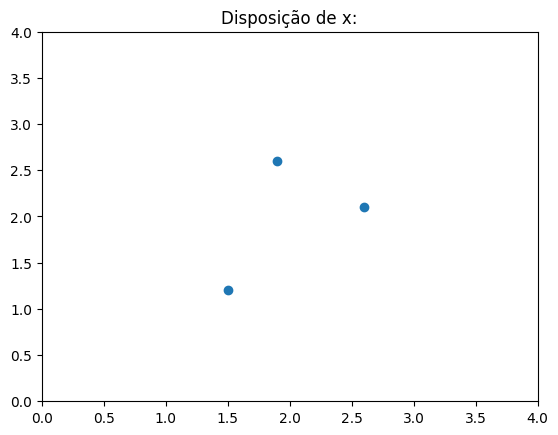

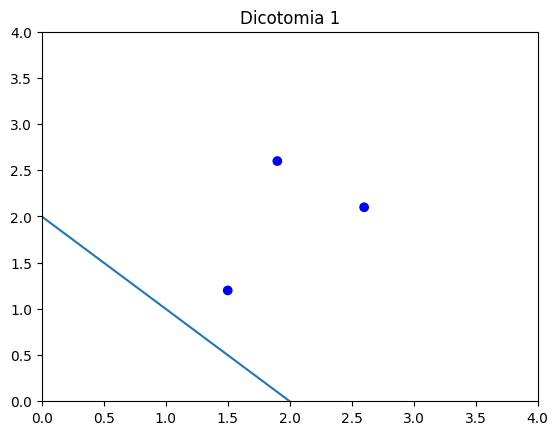

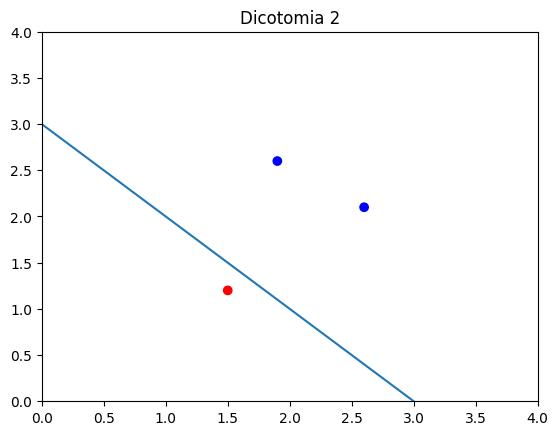

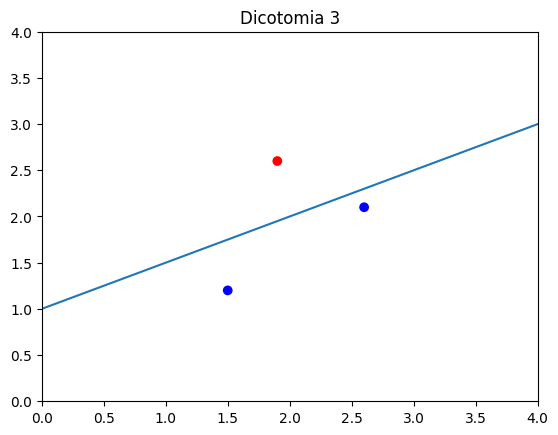

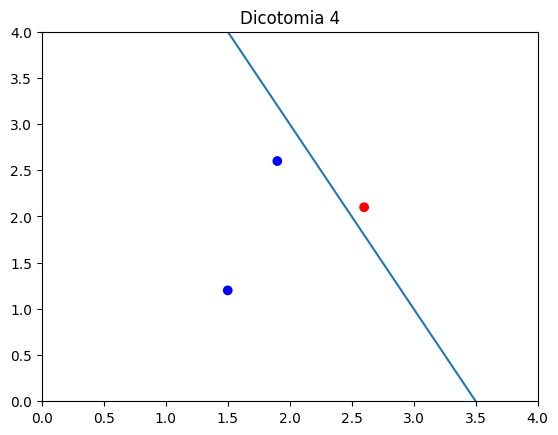

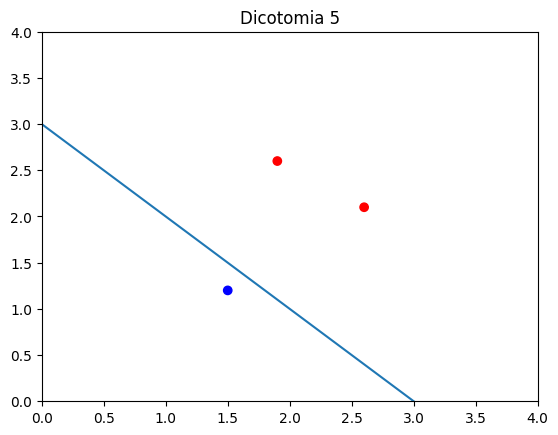

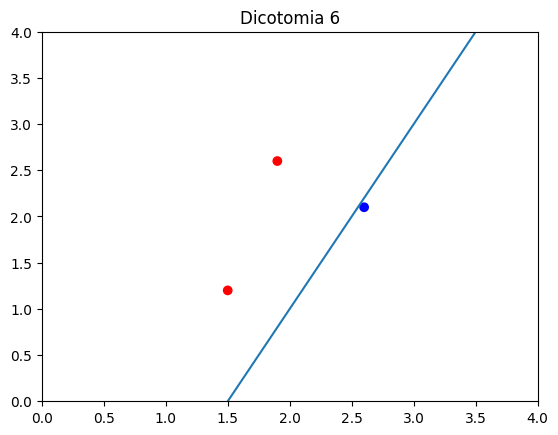

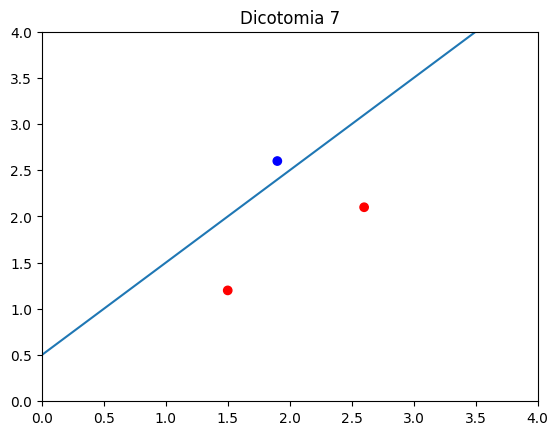

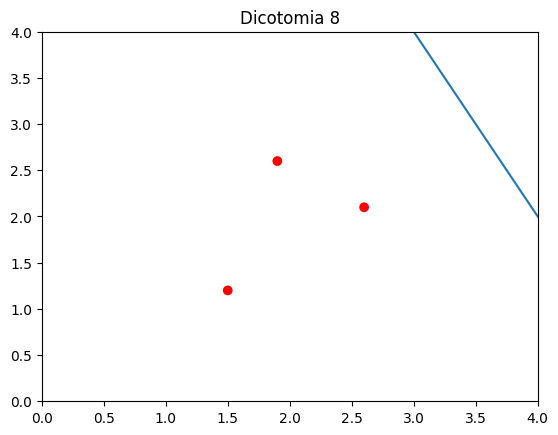

In [116]:
xx = np.linspace(0, 4, 100)
x = np.asarray([[1.5, 1.2], [1.9, 2.6], [2.6, 2.1]])

plt.figure()
plt.title(f"Disposição de x:")
axes = plt.gca()
axes.set_xlim([0, 4])
axes.set_ylim([0, 4])
plt.scatter(x[:, 0], x[:, 1])
plt.show()
print()

p = "blue"
n = "red"

def plota_dicotomia(yy, i, colors=3*[p]):
  plt.figure()
  plt.title(f"Dicotomia {i}")
  axes = plt.gca()
  axes.set_xlim([0, 4])
  axes.set_ylim([0, 4])
  plt.scatter(x[:, 0], x[:, 1], c=colors)
  plt.plot(xx, yy)
  plt.show()
  print()

plota_dicotomia(-xx+2, 1)
plota_dicotomia(-xx+3, 2, [n,p,p])
plota_dicotomia(0.5*xx+1, 3, [p,n,p])
plota_dicotomia(-2*xx+7, 4, [p,p,n])
plota_dicotomia(-xx+3, 5, [p,n,n])
plota_dicotomia(2*xx-3, 6, [n,n,p])
plota_dicotomia(xx+0.5, 7, [n,p,n])
plota_dicotomia(-2*xx+10, 8, [n,n,n])

Não importa se alguma reta varia só um pouco sem alterar o resultado para algum dos exemplos: ainda será a mesma dicotomia. É útil pensar nessas hipóteses "parecidas" como "classes de equivalência". Assim, note, pelos gráficos, que verificamos todas as $2^3=8$ dicotomias possíveis para a entrada específica $𝐱$. Perceba ainda que, se $𝐱$ for disposto da seguinte forma (três pontos colineares), não conseguiremos obter as oito dicotomias através do modelo do perceptron (não será possível obter $(+1,-1,+1)$, por exemplo):

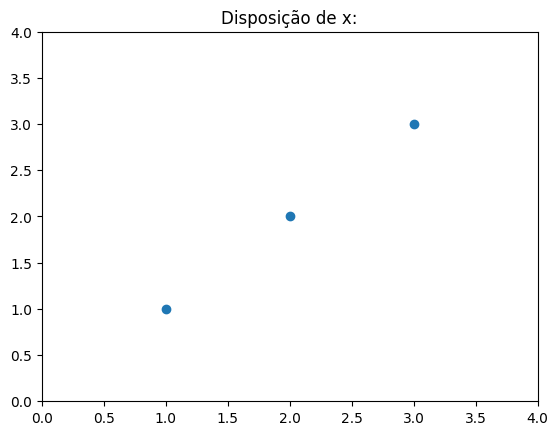

In [117]:
x = np.asarray([[1, 1], [2, 2], [3, 3]])
plt.figure()
plt.title(f"Disposição de x:")
axes = plt.gca()
axes.set_xlim([0, 4])
axes.set_ylim([0, 4])
plt.scatter(x[:, 0], x[:, 1])
plt.show()

Para a função de crescimento, o que importa é a entrada $𝐱$ que maximiza o número de dicotomias. Por isso, a entrada de exemplo dos pontos que não são colineares é válida para a função de crescimento, mas esta dos pontos colineares não é.

Para $N=4$, é possível verificar que $m_{\mathcal{H}}(N)<2^4=16$ (para qualquer entrada possível em $\mathcal{X}$). Assim, $k=4$ é o ponto de ruptura desse espaço de hipóteses $\mathcal{H}$.

###5.2. A dimensão VC
Iremos dispor de uma nova definição: a **dimensão Vapnik-Chervonenkis** de algum $\mathcal{H}$, denotado por $d_{VC}(\mathcal{H})$ ou apenas $d_{VC}$, é o valor máximo de $N$ que resulta em $m_{\mathcal{H}}(N)=2^N$. Se $m_{\mathcal{H}}(N)=2^N$ para todo $N$, então $d_{VC}(\mathcal{H})=\infty$.

Pela definição acima, temos que $k=d_{VC}(\mathcal{H})+1$ para $m_{\mathcal{H}}$. Assim, podemos reescrever o teorema $5.1$ como
\begin{align*}
    m_{\mathcal{H}}(N)\leq \sum_{i=0}{d_{VC}}\binom{N}{i}.
\end{align*}
É possível chegar num limite superior mais forte em termos de $d_{VC}$, que é o seguinte:
\begin{align*}
    m_{\mathcal{H}}(N)\leq N^{d_{VC}}+1.
\end{align*}
 Com o poder da abstração obtida pela dimensão VC, conseguimos compreender o teorema que abrange ainda mais o limite superior de generalização, que está enunciado a seguir.

**Teorema 5.2:** Para qualquer nível de tolerância $\delta>0$,
\begin{align*}
    E_{out}(g)\leq E_{in}(g)+\sqrt{\frac{8}{N}\ln{\frac{4m_{\mathcal{H}}(2N)}{\delta}}}
\end{align*}
com probabilidade de pelo menos $1-\delta$.

Com o novo teorema de generalização, podemos escolher $\mathcal{H}$ de tamanho infinito e, mesmo assim, conseguir uma conclusão a respeito da capacidade de generalização do modelo escolhido para a tarefa de aprendizado, desde que $d_{VC}$ seja finito. Dessa forma, mesmo que o espaço $\mathcal{H}$ escolhido tenha $d_{VC}$ alto, conseguiremos uma generalização boa com $\mathcal{D}$ de tamanho $N$ suficiente, já que $m_{\mathcal{H}}(2N)$ é levado como entrada da função logarítmica, que tem ordem menor que o $N$ do denominador adjacente (ainda considerando que $m_{\mathcal{H}}(2N)$ seja $O(N^{d_{VC}}$)).

Podemos expressar a desigualdade da generalização como
\begin{align*}
    E_{out}(g)\leq E_{in}(g)+\Omega(N,\mathcal{H},\delta),
\end{align*}
onde
\begin{align*}
    \Omega(N,\mathcal{H},\delta)&=\sqrt{\frac{8}{N}\ln{\frac{4m_{\mathcal{H}}(2N)}{\delta}}}\\
    &\leq \sqrt{\frac{8}{N}\ln{\frac{4((2N)^{d_{VC}}+1)}{\delta}}}.
\end{align*}
É possível interpretar $\Omega(N,\mathcal{H},\delta)$ como uma penalidade pela complexidade do modelo, de modo que a generalização fica mais fraca quando usamos um $\mathcal{H}$ mais complexo, ou seja, de maior dimensão VC. Mesmo com essa penalidade, um espaço de hipóteses mais complexo costuma melhorar $E_{in}$, já que possuímos mais possibilidades de escolha de $g$ em $\mathcal{H}$. Um modelo ótimo minimiza $E_{out}$ visando uma melhora também em $E_{in}$.

Embora $E_{out}$ seja desconhecido, podemos estimá-lo com um conjunto de dados chamado de **conjunto de teste**, que não foi utilizado no processo de treinamento (já que isso desperdiçaria o propósito desse conjunto). Com $g$ escolhido ao final do treinamento do modelo, podemos usar a primeira desigualdade de Hoeffding que vimos, já que $h=g$ é fixo e sua escolha não foi afetada pelo conjunto de treinamento, e, assim, obtemos um limite superior de generalização ainda melhor. (Para o cálculo do limite superior, apenas precisaríamos substituir $E_{in}$ por $E_{test}$, o erro correspondente ao conjunto de treinamento. Note que este erro é uma estimativa amostral, assim como esse.)

##6. Breve intuição para $f$ real e análise de viés e variância

A análise da generalização (feita anteriormente com $f$ binária) pode ser extendida para $f$ real. Para isso, defina as novas medidas de erro
\begin{align*}
E_{out}(h)=\mathbb{E}[(h(𝐱)-f(𝐱))^2]
\end{align*} e
\begin{align*}
E_{in}(h)=\frac{1}{N}\sum_{n=1}^N(h(𝐱_N)-f(𝐱_N))^2.
\end{align*}
Intuitivamente, podemos pensar que o erro amostral converge para o valor esperado desse erro conforme $N$ aumenta. Note que a desigualdade de Hoeffding, usada para $f$ binária, é um dos formatos da lei dos grandes números. Assim, ao adaptarmos a afirmação para $f$ real, estamos usando a mesma lei para concluir a capacidade de generalização do modelo (dada variância finita, assim como $d_{VC}$ finita no caso binário).

Por fim, veremos agora a análise de viés e variância.
Em vez de limitar $E_{out}$ por $E_{in}+\Omega(N,\mathcal{H},\delta)$, iremos decompor $E_{out}$ para obter a conclusão da generalização.

Sabemos que
\begin{align*}
E_{out}(g^{(\mathcal{D})})=\mathbb{E}_𝐱[(g^{(\mathcal{D})}(𝐱)-f(𝐱))^2],
\end{align*}
onde $\mathbb{E}_𝐱$ é o valor esperado em relação a $𝐱$, obtido por amostragem de $\mathcal{X}$ através de uma distribuição $P$, e $g^{(\mathcal{D})}$ é a função aproximadora, dependente de $\mathcal{D}$. Tomando o valor esperado da equação em relação a todo $\mathcal{D}$ (para não dependermos de um conjunto específico de dados), obtemos
\begin{align*}
\mathbb{E}_{(\mathcal{D})}[E_{out}(g^{(\mathcal{D})})]&=\mathbb{E}_{\mathcal{D}}[\mathbb{E}_𝐱[(g^{(\mathcal{D})}(𝐱)-f(𝐱))^2]]\\
&=\mathbb{E}_𝐱[\mathbb{E}_{\mathcal{D}}[(g^{(\mathcal{D})}(𝐱)-f(𝐱))^2]]\\
&=\mathbb{E}_𝐱[\mathbb{E}_{\mathcal{D}}[g^{(\mathcal{D})}(𝐱)^2]-2\mathbb{E}_{\mathcal{D}}[g^{(\mathcal{D})}(𝐱)]f(𝐱)+f(𝐱)^2].
\end{align*}
Pela dependência em $\mathcal{D}$, que é uma amostra de $\mathcal{X}$ sob $P$, $g(𝐱)$ pode ser considerada uma variável aleatória. Denote $\bar{g}(𝐱)=\mathbb{E}_{\mathcal{D}}[g^{(\mathcal{D})}(𝐱)]$ como o valor esperado dessa "função" aleatória para $𝐱$ específico. A função $\bar{g}$ não precisa fazer parte de $\mathcal{H}$. Reescrevendo a equação acima em termos de $\bar{g}$:
\begin{align*}
\mathbb{E}_{(\mathcal{D})}[E_{out}(g^{(\mathcal{D})})]&=\mathbb{E}_𝐱[\mathbb{E}_{\mathcal{D}}[g^{(\mathcal{D})}(𝐱)^2]-2\bar{g}(𝐱)f(𝐱)+f(𝐱)^2]\\
&=\mathbb{E}_𝐱[\mathbb{E}_{\mathcal{D}}[g^{(\mathcal{D})}(𝐱)^2]-\bar{g}(𝐱)^2+\bar{g}(𝐱)^2-2\bar{g}(𝐱)f(𝐱)+f(𝐱)^2]\\
&=\mathbb{E}_𝐱[\mathbb{E}_{\mathcal{D}}[(g^{(\mathcal{D})}(𝐱)-\bar{g}(𝐱))^2]+(\bar{g}(𝐱)-f(𝐱))^2],
\end{align*}
em que a última linha é resultado do fato de que $\bar{g}(𝐱)$ é constante em relação a $\mathcal{D}$. O termo $(\bar{g}(𝐱)-f(𝐱))^2$ é chamado de viés (relacionado a $𝐱$), que mede a disparidade de $\bar{g}$ em relação a $f$. Podemos interpretar esse viés como uma medida de quanto as hipotéses finais $g$ aproximam $f$ na média. O termo $\mathbb{E}_{\mathcal{D}}[(g^{(\mathcal{D})}(𝐱)-\bar{g}(𝐱))^2]$ é chamado de variância de $g^{(\mathcal{D})}(𝐱)$, que mede a variação da função aproximadora escolhida, dependente do conjunto de dados. Podemos interpretar essa variância como uma medida de "instabilidade" do modelo. Com pequenas variações nos dados, se o modelo gerar resultados muito díspares de cada conjunto de treinamento, dizemos que ele é relativamente instável.

Por mais que os termos de viés e variância não possam ser computados diretamente, podemos ter intuições boas para melhorar os modelos de aprendizado com base nessa análise. Geralmente queremos diminuir a variância sem aumentar tanto o viés ou diminuir o viés sem aumentar tanto a variância. Esses objetivos são atingidos por meio de técnicas criadas a partir da decomposição de $E_{out}$. Assim, a análise de viés e variância é um ótimo instrumento a ser adicionado em nosso repertório para ML.